## reference (only close) & 10 bar shifted:

In [1]:
import pandas as pd

data = pd.read_csv('data_sample_three_years.csv')

data = data.iloc[:, [0,2,3,4]]
data.rename(columns={'low':'close', 'open':'high', 'high':'low'}, inplace=True)

for i in range(1,11):
    data[f'close+{i}'] = data['close'].shift(i)
data.dropna(axis=0, inplace=True)

inputs = data.iloc[:, [4,5,6,7,8,9,0,11,12,13]]
target = data.iloc[:, [3]]

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=1, shuffle=False)

regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [3]:
pred = regressor.predict(X_test)
y_test['pred'] = pred

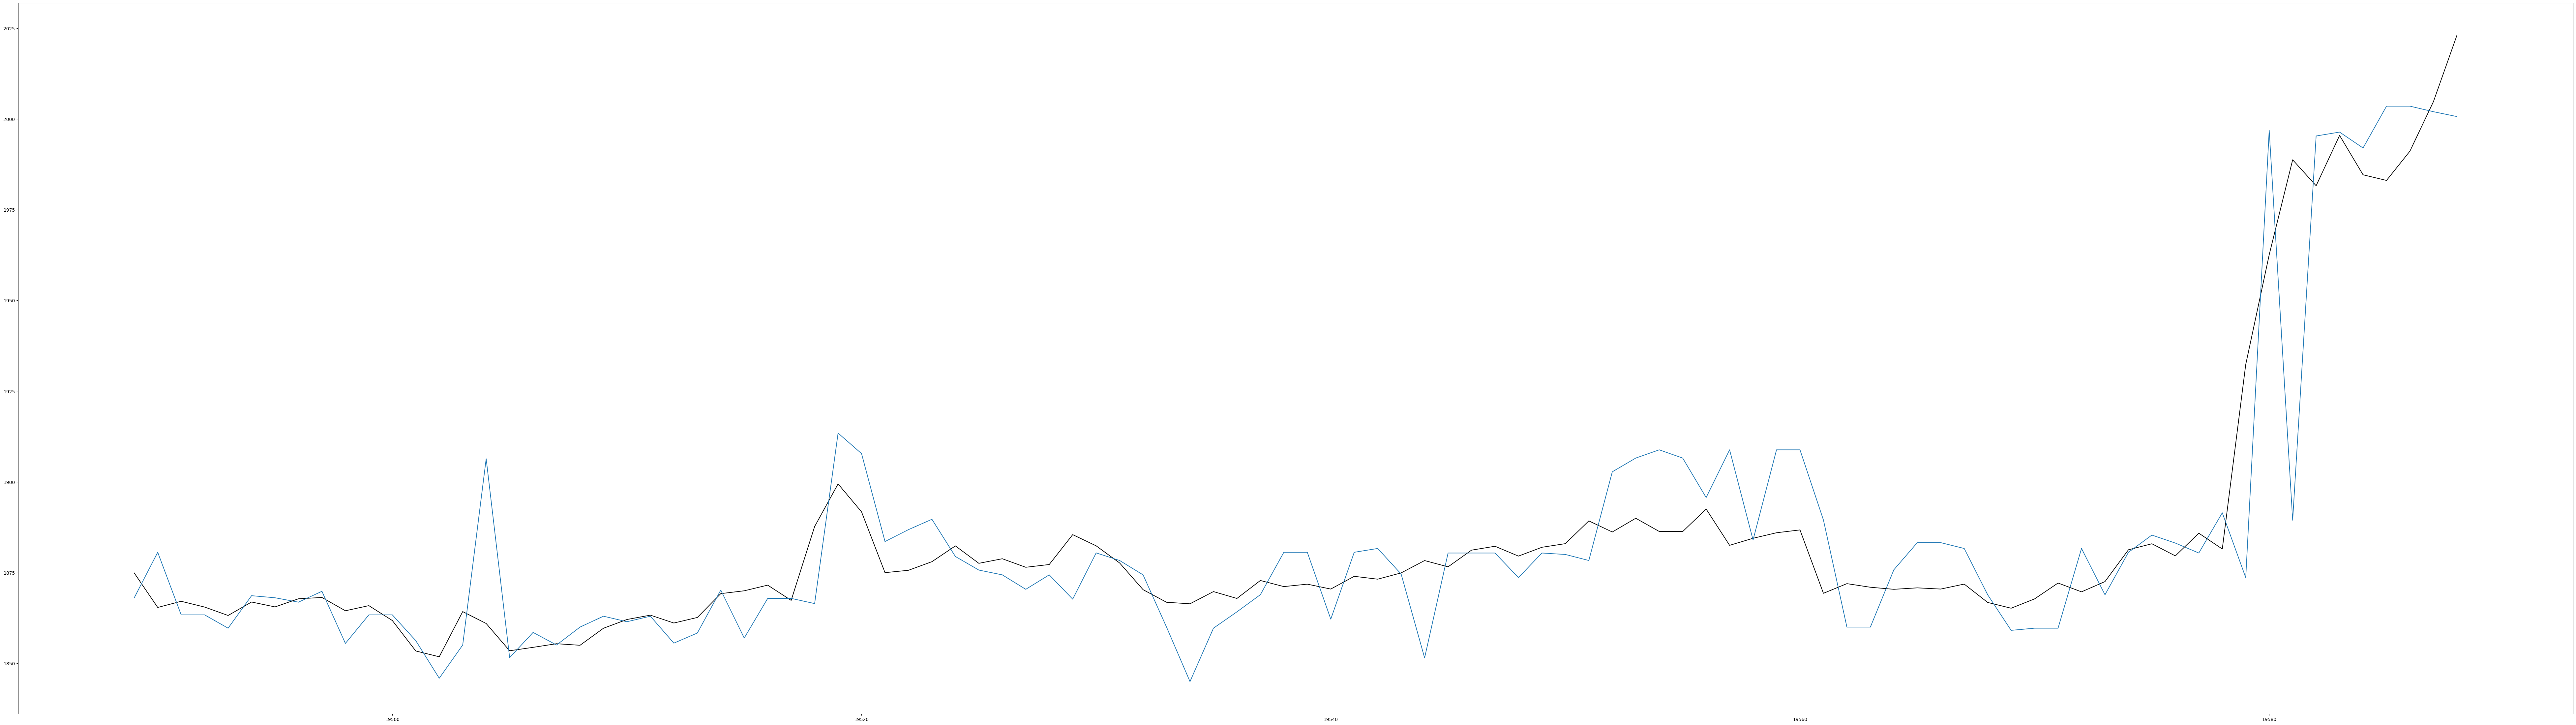

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_test['close'].iloc[:100], color='black')
plt.plot(y_test['pred'].iloc[:100])
plt.show()

## prediction with ma (10 bar shifted):

In [5]:
import pandas as pd

data2 = pd.read_csv('data_sample_three_years.csv')

data2 = data2.iloc[:, [0,2,3,4]]
data2.rename(columns={'low':'close', 'open':'high', 'high':'low'}, inplace=True)

for i in range(1,11):
    data2[f'close+{i}'] = data2['close'].shift(i)

from talib import MA, SMA, EMA
data2['ma'] = MA(data2['close'])

for i in range(1,11):
    data2[f'ma+{i}'] = data2['ma'].shift(i)

data2.dropna(axis=0, inplace=True)

inputs2 = data2.iloc[:, [4,5,6,7,8,9,0,11,12,13,15,16,17,18,19,20,21,22,23,24]]
target2 = data2.iloc[:, [3]]

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs2, target2, test_size=0.2, random_state=1, shuffle=False)

regressor2 = DecisionTreeRegressor(random_state=1)
regressor2.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=1)

In [7]:
pred2 = regressor2.predict(X_test2)
y_test2['pred'] = pred2

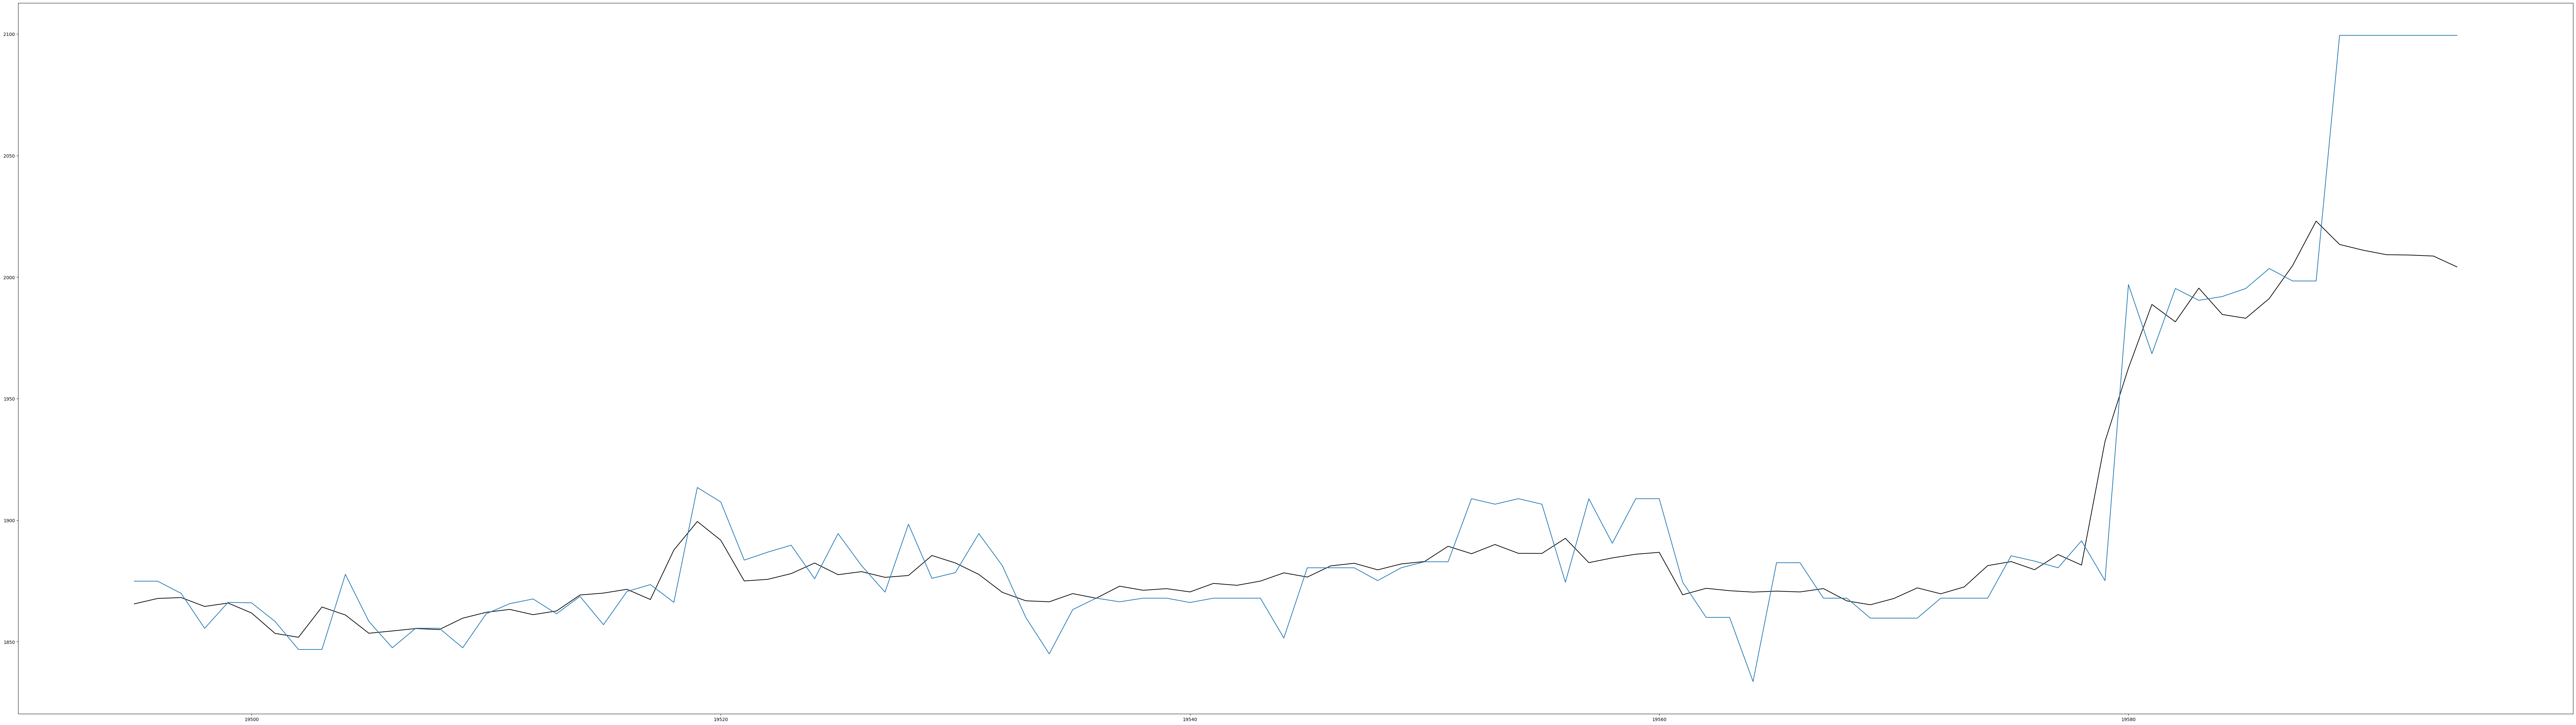

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_test2['close'].iloc[:100], color='black')
plt.plot(y_test2['pred'].iloc[:100])
plt.show()

## predict MA only:

In [9]:
import pandas as pd

data3 = pd.read_csv('data_sample_three_years.csv')

data3 = data3.iloc[:, [0,2,3,4]]
data3.rename(columns={'low':'close', 'open':'high', 'high':'low'}, inplace=True)

from talib import MA, SMA, EMA
data3['ma'] = MA(data3['close'])

for i in range(1,11):
    data3[f'ma+{i}'] = data3['ma'].shift(i)

data3.dropna(axis=0, inplace=True)

inputs3 = data3.iloc[:, [5,6,7,8,9,10,11,12,13,14]]
target3 = data3.iloc[:, [4]]

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

X_train3, X_test3, y_train3, y_test3 = train_test_split(inputs3, target3, test_size=0.2, random_state=1, shuffle=False)

regressor3 = DecisionTreeRegressor(random_state=1)
regressor3.fit(X_train3, y_train3)

DecisionTreeRegressor(random_state=1)

In [11]:
pred3 = regressor3.predict(X_test3)
y_test3['pred'] = pred3

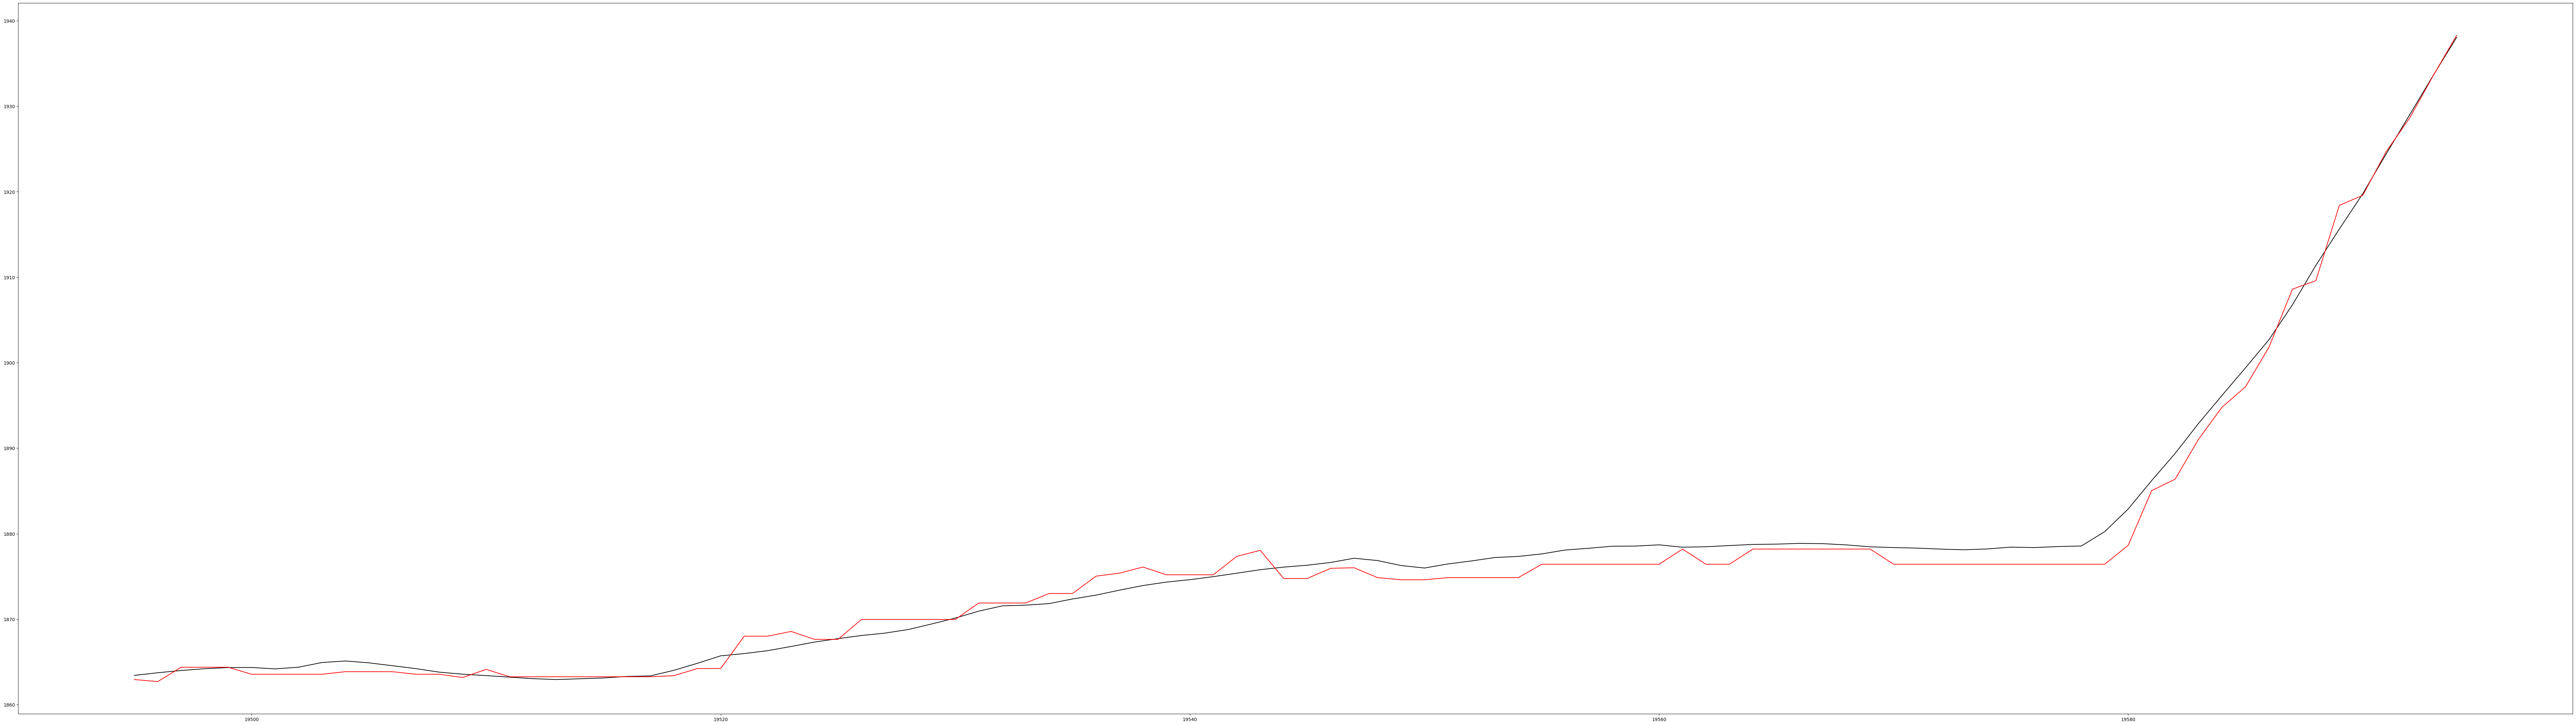

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_test3['ma'].iloc[:100], color='black')
plt.plot(y_test3['pred'].iloc[:100], color='red')
plt.show()

## Heikin Ashi trry

In [13]:
import pandas as pd

data4 = pd.read_csv('data_sample_three_years.csv')

data4 = data4.iloc[:, [0,1,2,3,4]]
data4.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)


In [14]:
from pandas_ta import ha

data_ha = ha(data4['open'], data4['high'], data4['low'], data4['close'])

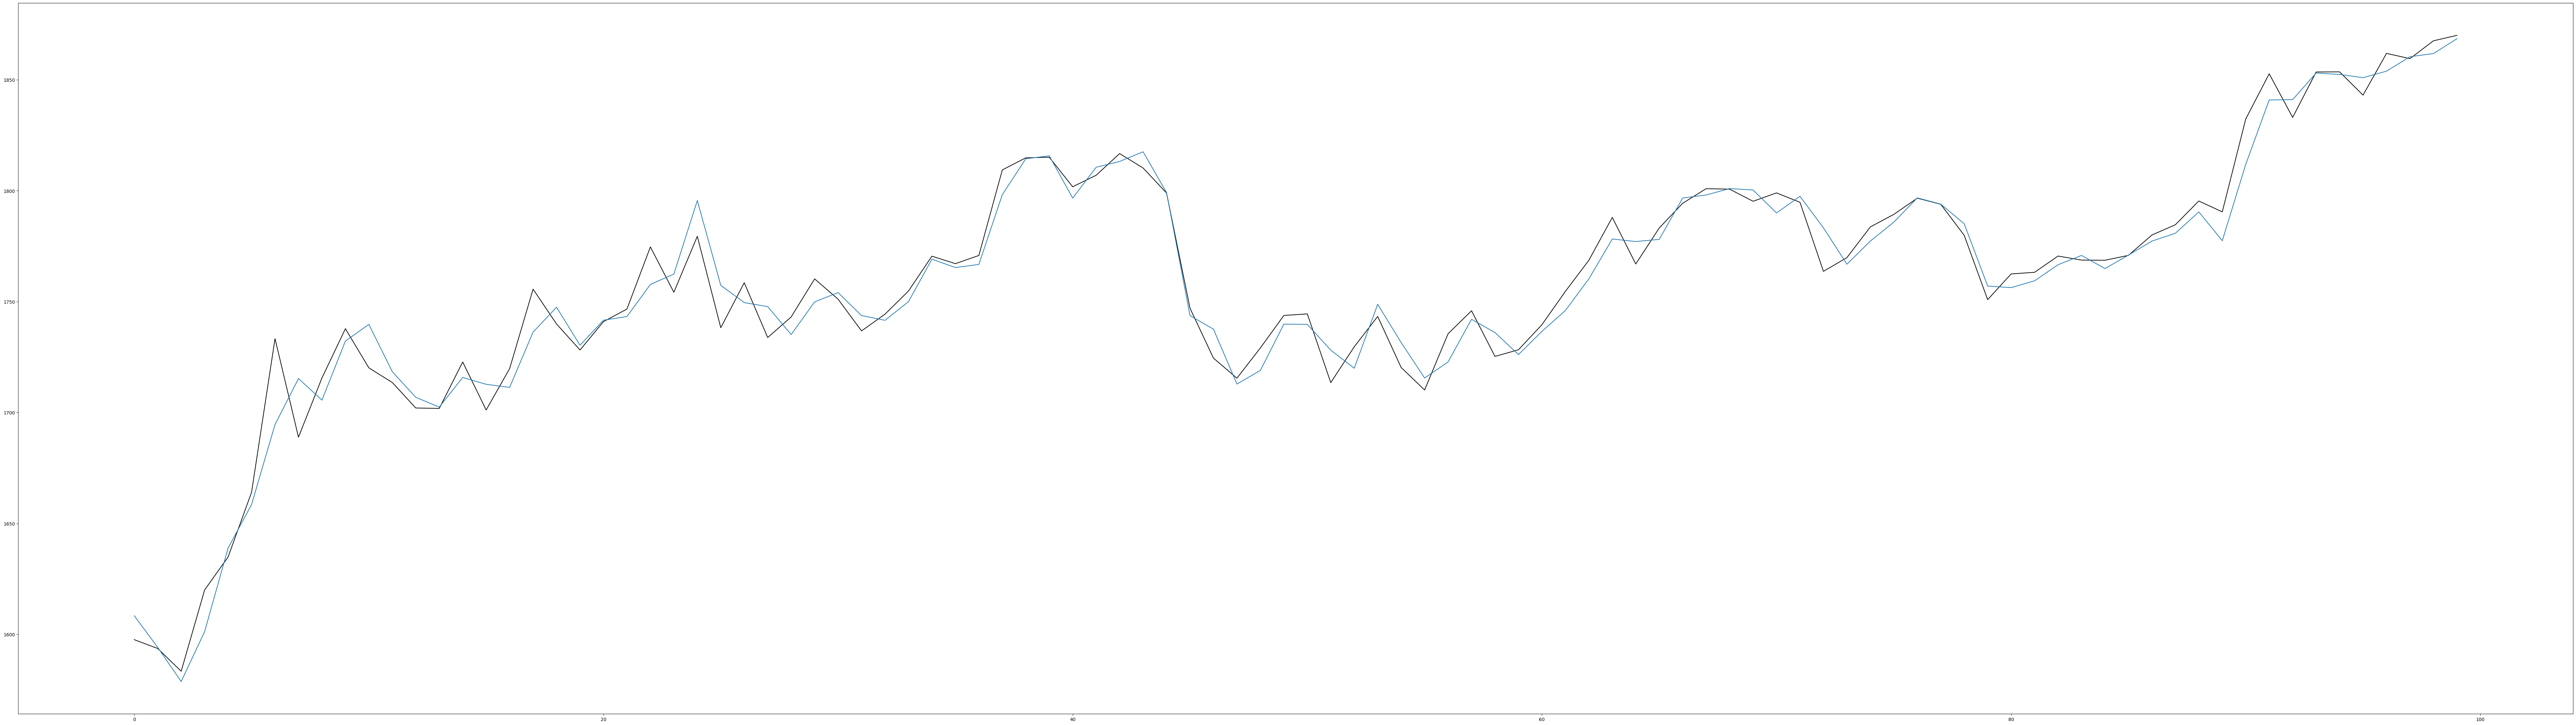

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(data4['close'].iloc[:100], color='black')
plt.plot(data_ha['HA_close'].iloc[:100])
plt.show()

nevermind...

continuing...

## RandomForestRegressor: 1st try

In [16]:
import pandas as pd

data5 = pd.read_csv('data_sample_three_years.csv')

data5 = data5.iloc[:, [0,2,3,4]]
data5.rename(columns={'low':'close', 'open':'high', 'high':'low'}, inplace=True)

from talib import MA, SMA, EMA
data5['ma'] = MA(data5['close'])

for i in range(1,11):
    data5[f'ma+{i}'] = data5['ma'].shift(i)

data5.dropna(axis=0, inplace=True)

inputs5 = data5.iloc[:, [5,6,7,8,9,10,11,12,13,14]]
target5 = data5.iloc[:, [4]]

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor

X_train5, X_test5, y_train5, y_test5 = train_test_split(inputs5, target5, test_size=0.2, random_state=1, shuffle=False)

random_tree_regressor = RandomForestRegressor(n_estimators=100, random_state=1)
random_tree_regressor.fit(X_train5, y_train5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=1)

In [18]:
pred5 = random_tree_regressor.predict(X_test5)
y_test5['pred'] = pred5

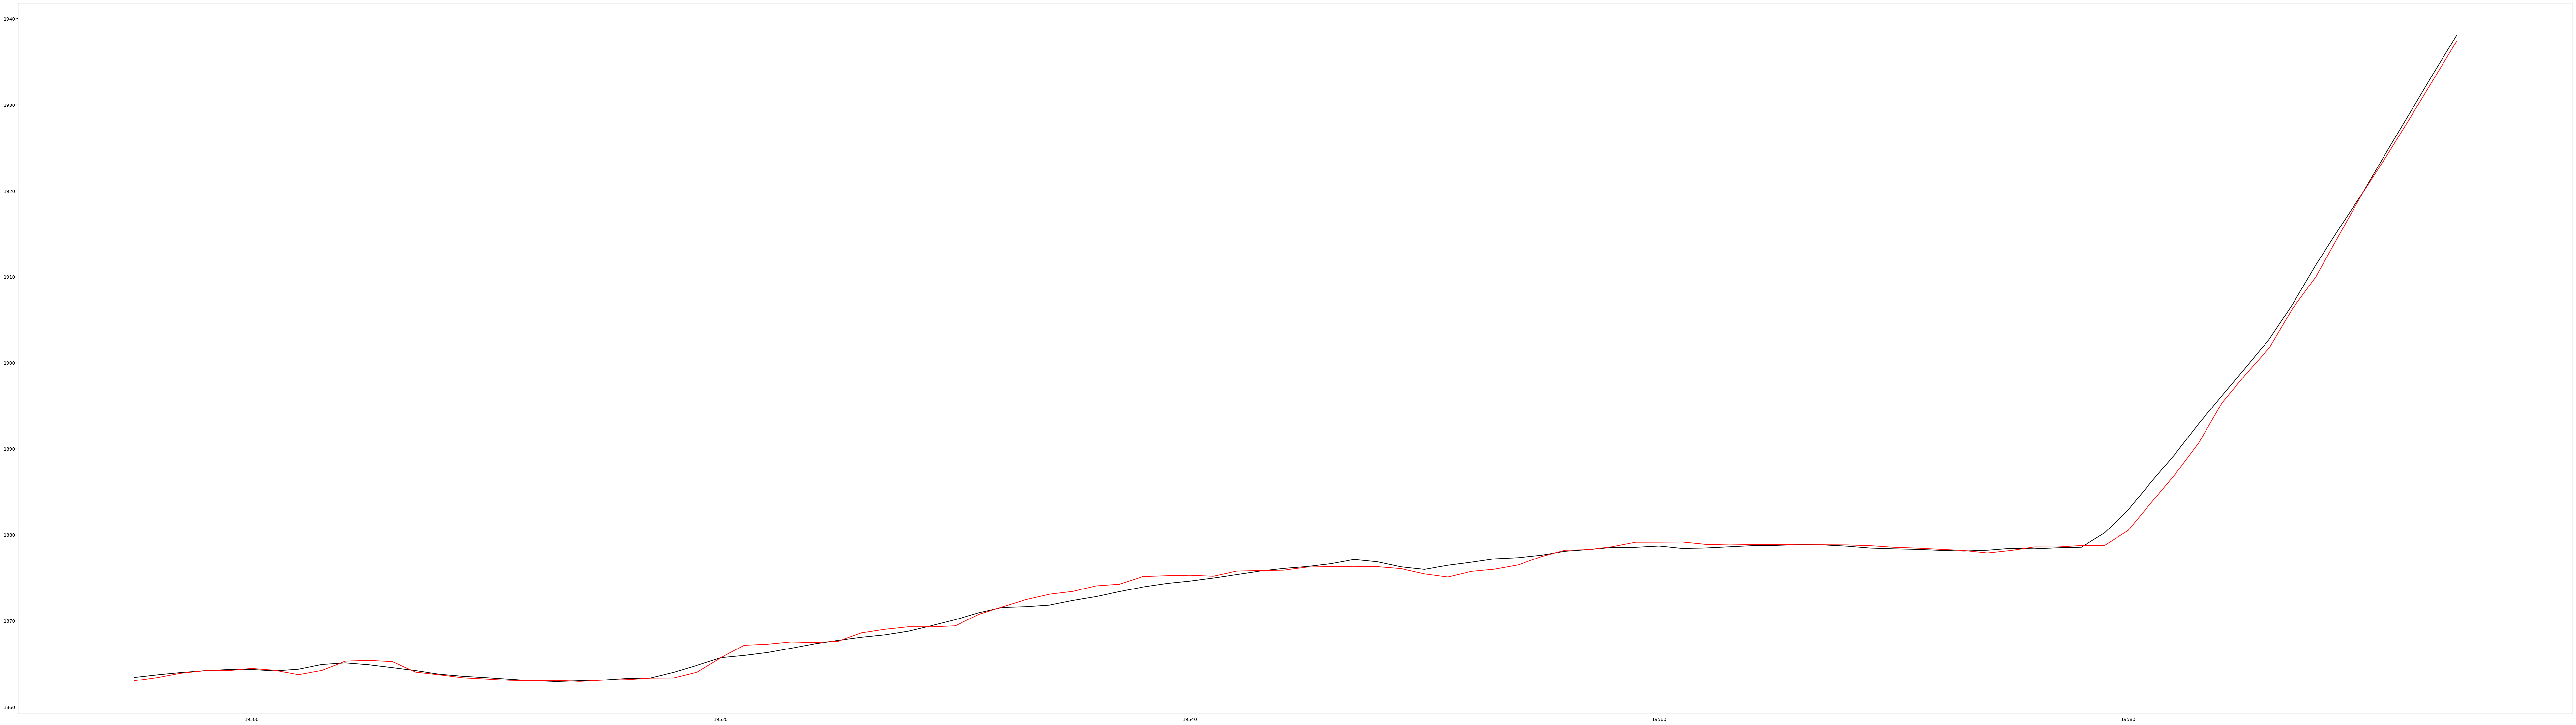

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_test5['ma'].iloc[:100], color='black')
plt.plot(y_test5['pred'].iloc[:100], color='red')
plt.show()

## RandomForestRegressor for price:

In [1]:
import pandas as pd

data6 = pd.read_csv('data_sample_three_years.csv')

data6 = data6.iloc[:, [0,2,3,4]]
data6.rename(columns={'low':'close', 'open':'high', 'high':'low'}, inplace=True)

for i in range(1,11):
    data6[f'close+{i}'] = data6['close'].shift(i)
data6.dropna(axis=0, inplace=True)

inputs6 = data6.iloc[:, [4,5,6,7,8,9,10,11,12,13]]
target6 = data6.iloc[:, [3]]

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor

X_train6, X_test6, y_train6, y_test6 = train_test_split(inputs6, target6, test_size=0.2, random_state=1, shuffle=False)

random_tree_regressor2 = RandomForestRegressor(n_estimators=100, random_state=1)
random_tree_regressor2.fit(X_train6, y_train6)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=1)

In [3]:
pred6 = random_tree_regressor2.predict(X_test6)
y_test6['pred'] = pred6

In [4]:
mean_squared_error(pred6, y_test6['close'])

135.67480941791237

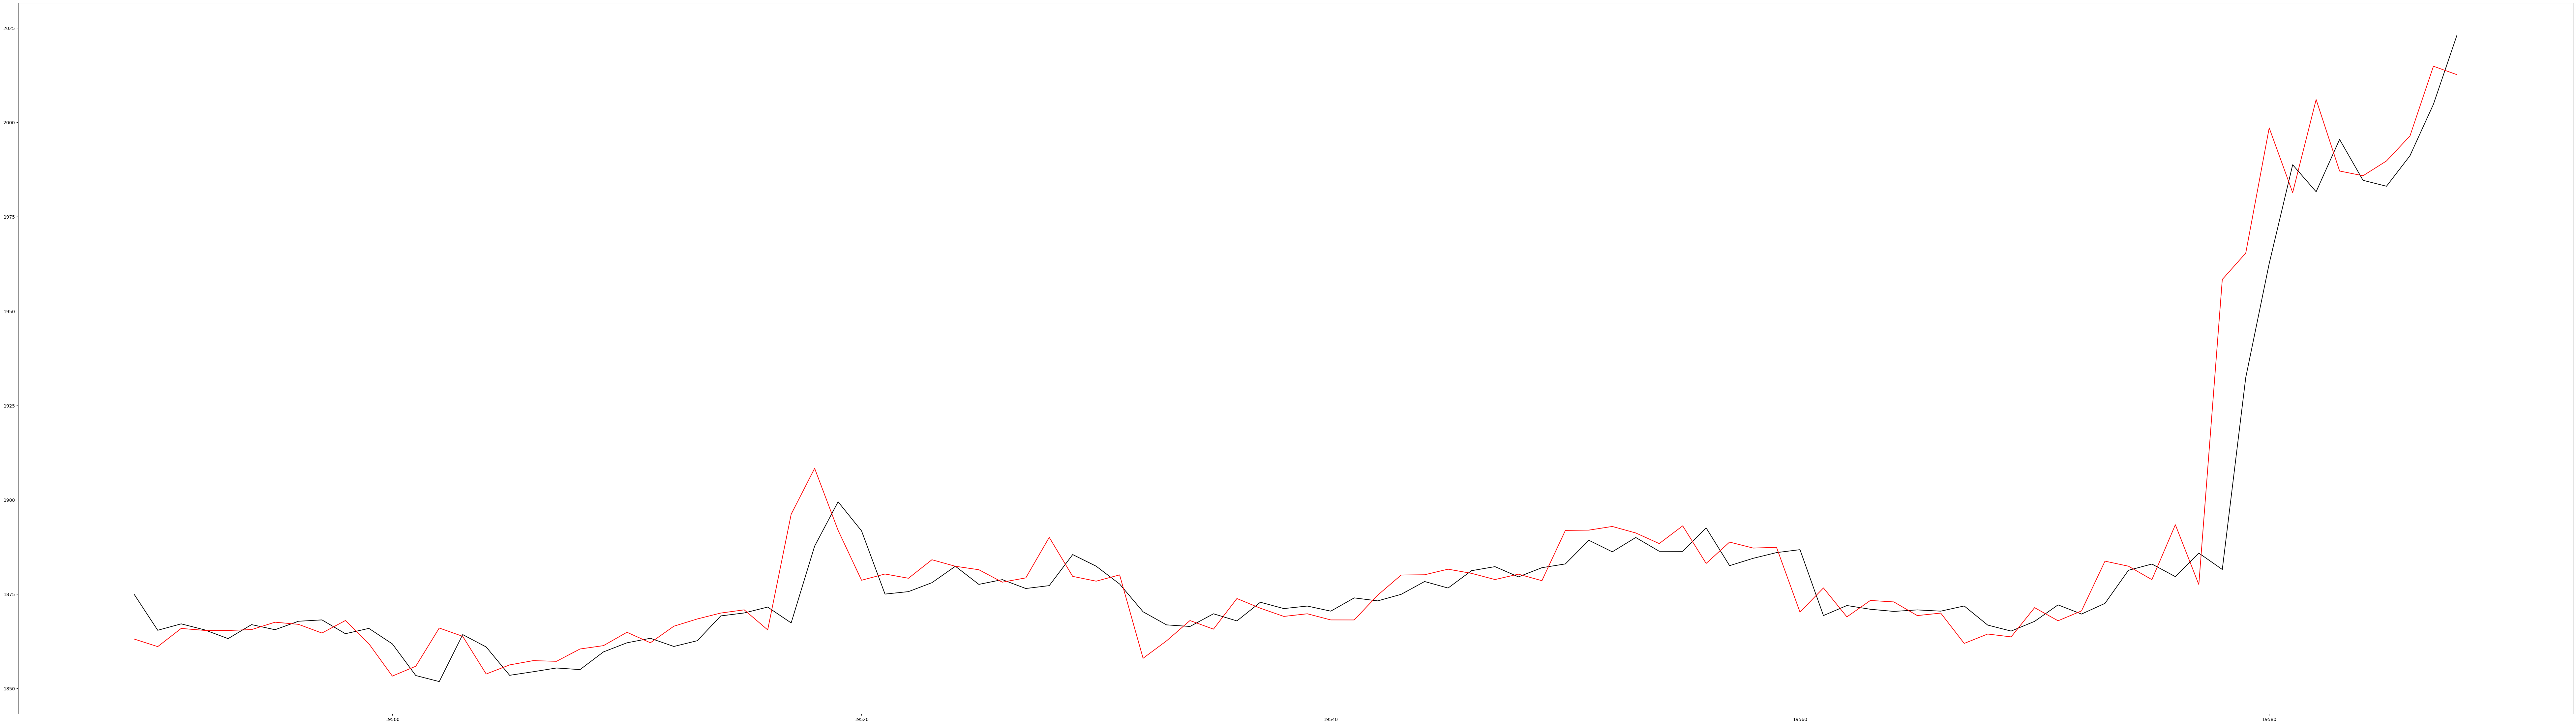

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(y_test6['close'].iloc[:100], color='black')
plt.plot(y_test6['pred'].shift(-2).iloc[:100], color='red')
plt.show()

In [25]:
y_test6

close       pred
19489  1874.90  1865.3773
19490  1865.41  1875.6002
19491  1867.11  1863.5353
19492  1865.52  1860.7963
19493  1863.20  1864.5330
...        ...        ...
24354  2438.64  2353.7081
24355  2429.71  2405.3253
24356  2424.75  2393.4118
24357  2424.22  2365.5393
24358  2433.89  2366.2067

[4870 rows x 2 columns]

In [5]:
y_test6.to_excel('random_forest_data.xlsx')

## RandomForestRegressor: highs & lows

In [33]:
import pandas as pd

data7 = pd.read_csv('data_sample_three_years.csv')

data7 = data7.iloc[:, [0,2,3,4]]
data7.rename(columns={'low':'close', 'open':'high', 'high':'low'}, inplace=True)

for i in range(1,11):
    data7[f'high+{i}'] = data7['high'].shift(i)
for i in range(1,11):
    data7[f'low+{i}'] = data7['low'].shift(i)
data7.dropna(axis=0, inplace=True)

In [43]:
inputs7_highs = data7.iloc[:, [4,5,6,7,8,9,10,11,12,13]]
target7_highs = data7.iloc[:, [1]]

inputs7_lows = data7.iloc[:, [14,15,16,17,18,19,20,21,22,23]]
target7_lows = data7.iloc[:, [2]]

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor

X_train7_h, X_test7_h, y_train7_h, y_test7_h = train_test_split(inputs7_highs, target7_highs, test_size=0.2, random_state=1, shuffle=False)
X_train7_l, X_test7_l, y_train7_l, y_test7_l = train_test_split(inputs7_lows, target7_lows, test_size=0.2, random_state=1, shuffle=False)

random_tree_highs = RandomForestRegressor(n_estimators=100, random_state=1)
random_tree_highs.fit(X_train7_h, y_train7_h)

random_tree_lows = RandomForestRegressor(n_estimators=100, random_state=1)
random_tree_lows.fit(X_train7_l, y_train7_l)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=1)

In [45]:
pred7_highs = random_tree_highs.predict(X_test7_h)
y_test7_h['pred'] = pred7_highs

pred7_lows = random_tree_lows.predict(X_test7_l)
y_test7_l['pred'] = pred7_lows

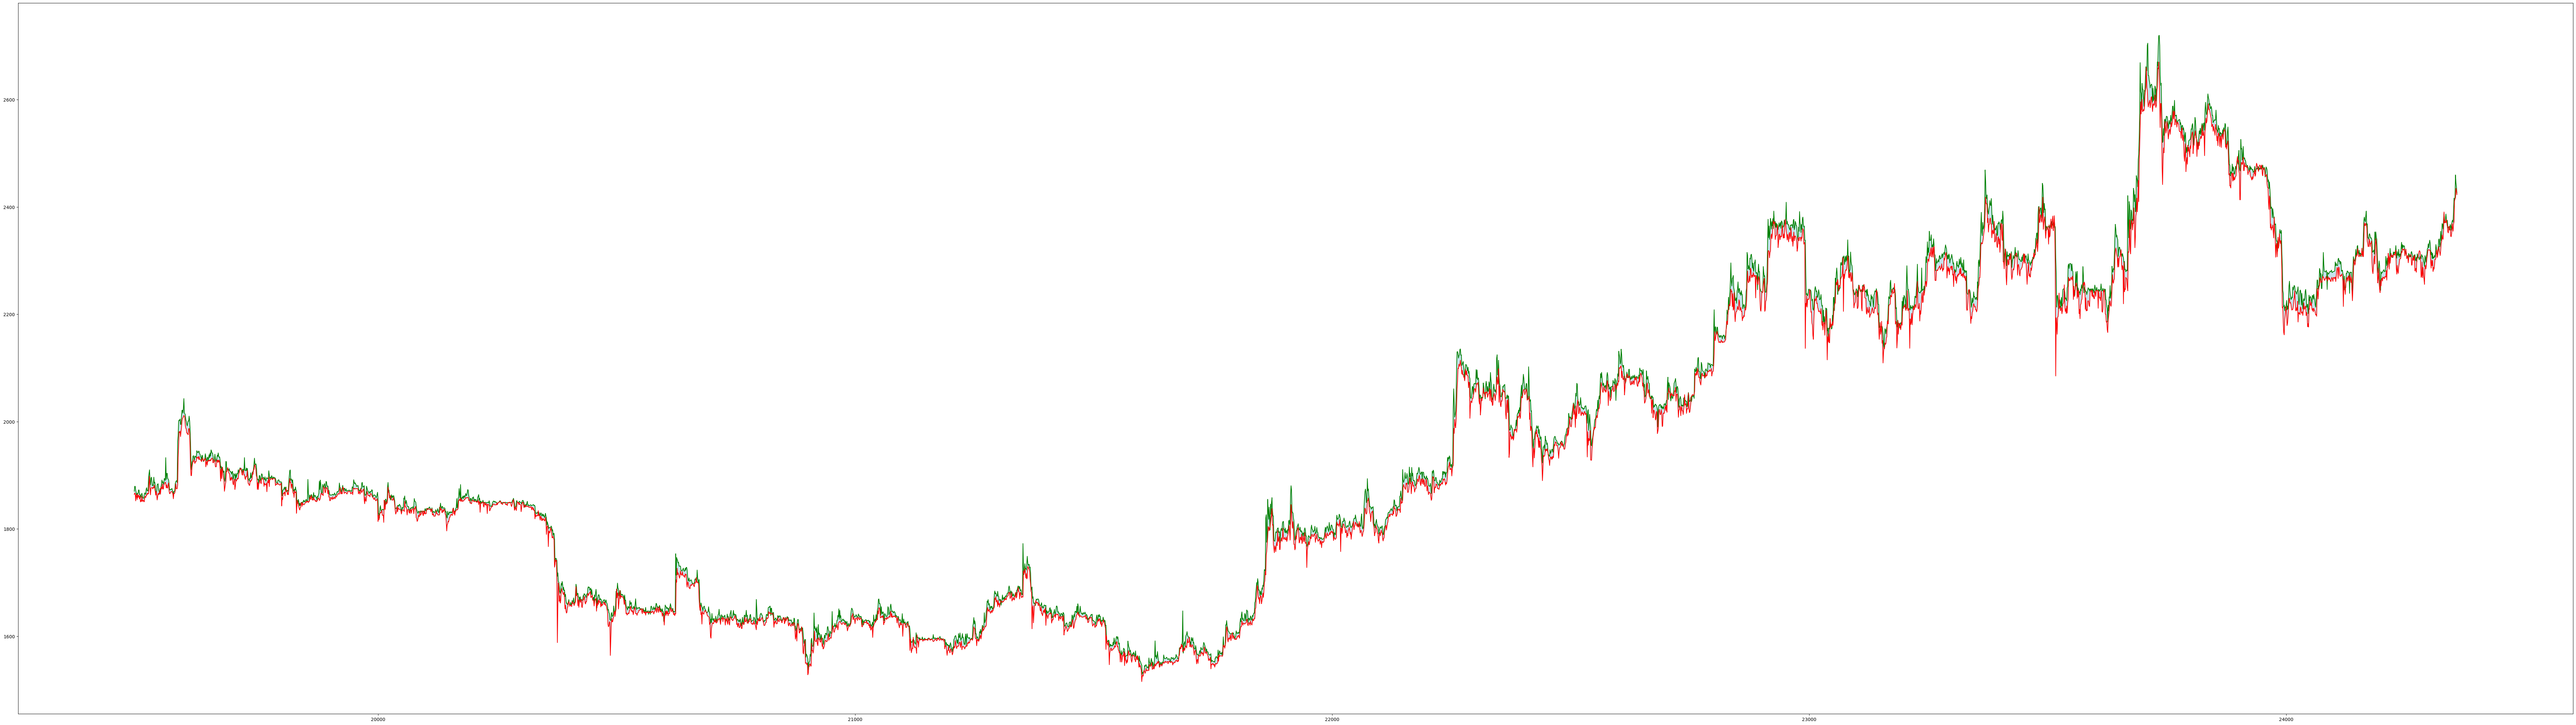

<Figure size 640x480 with 0 Axes>

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

x = y_test7_h.index

plt.plot(y_test7_h['pred'], color='green')
plt.plot(y_test7_l['pred'], color='red')
plt.fill_between(x, y_test7_h['pred'], y_test7_l['pred'], color='lightblue', alpha=0.7)
plt.show()
plt.savefig('test.png')

## prediction for a given entry:

In [63]:
data6.iloc[:12]

timestamp     high      low    close  close+1  close+2  close+3  close+4  \
10  1612800000  1782.50  1718.45  1720.11  1737.78  1715.56  1688.87  1733.28   
11  1612803600  1734.43  1705.45  1713.52  1720.11  1737.78  1715.56  1688.87   
12  1612807200  1720.93  1690.87  1702.03  1713.52  1720.11  1737.78  1715.56   
13  1612810800  1713.20  1692.70  1701.83  1702.03  1713.52  1720.11  1737.78   
14  1612814400  1741.60  1696.97  1722.77  1701.83  1702.03  1713.52  1720.11   
15  1612818000  1726.70  1700.00  1701.14  1722.77  1701.83  1702.03  1713.52   
16  1612821600  1724.82  1699.56  1719.79  1701.14  1722.77  1701.83  1702.03   
17  1612825200  1758.99  1710.69  1755.61  1719.79  1701.14  1722.77  1701.83   
18  1612832400  1758.96  1732.06  1739.90  1755.61  1719.79  1701.14  1722.77   
19  1612836000  1740.00  1713.20  1728.18  1739.90  1755.61  1719.79  1701.14   
20  1612843200  1755.00  1731.39  1740.96  1728.18  1739.90  1755.61  1719.79   
21  1612846800  1753.25  1732.24  1746.64  1740.96  1728.18  1739.90  1755.61   

    close+5  close+6  close+7  close+8  close+9  close+10  
10  1664.03  1634.87  1620.00  1583.35  1593.61   1597.59  
11  1733.28  1664.03  1634.87  1620.00  1583.35   1593.61  
12  1688.87  1733.28  1664.03  1634.87  1620.00   1583.35  
13  1715.56  1688.87  1733.28  1664.03  1634.87   1620.00  
14  1737.78  1715.56  1688.87  1733.28  1664.03   1634.87  
15  1720.11  1737.78  1715.56  1688.87  1733.28   1664.03  
16  1713.52  1720.11  1737.78  1715.56  1688.87   1733.28  
17  1702.03  1713.52  1720.11  1737.78  1715.56   1688.87  
18  1701.83  1702.03  1713.52  1720.11  1737.78   1715.56  
19  1722.77  1701.83  1702.03  1713.52  1720.11   1737.78  
20  1701.14  1722.77  1701.83  1702.03  1713.52   1720.11  
21  1719.79  1701.14  1722.77  1701.83  1702.03   1713.52

In [76]:
random_tree_regressor2.predict(y_test6.close.iloc[1:11].to_numpy().reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1864.5])

In [77]:
res=[]
for i in range(len(y_test6)-10):
    val = random_tree_regressor2.predict(y_test6.close.iloc[i:i+10].to_numpy().reshape(1,-1))
    res.append(val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does

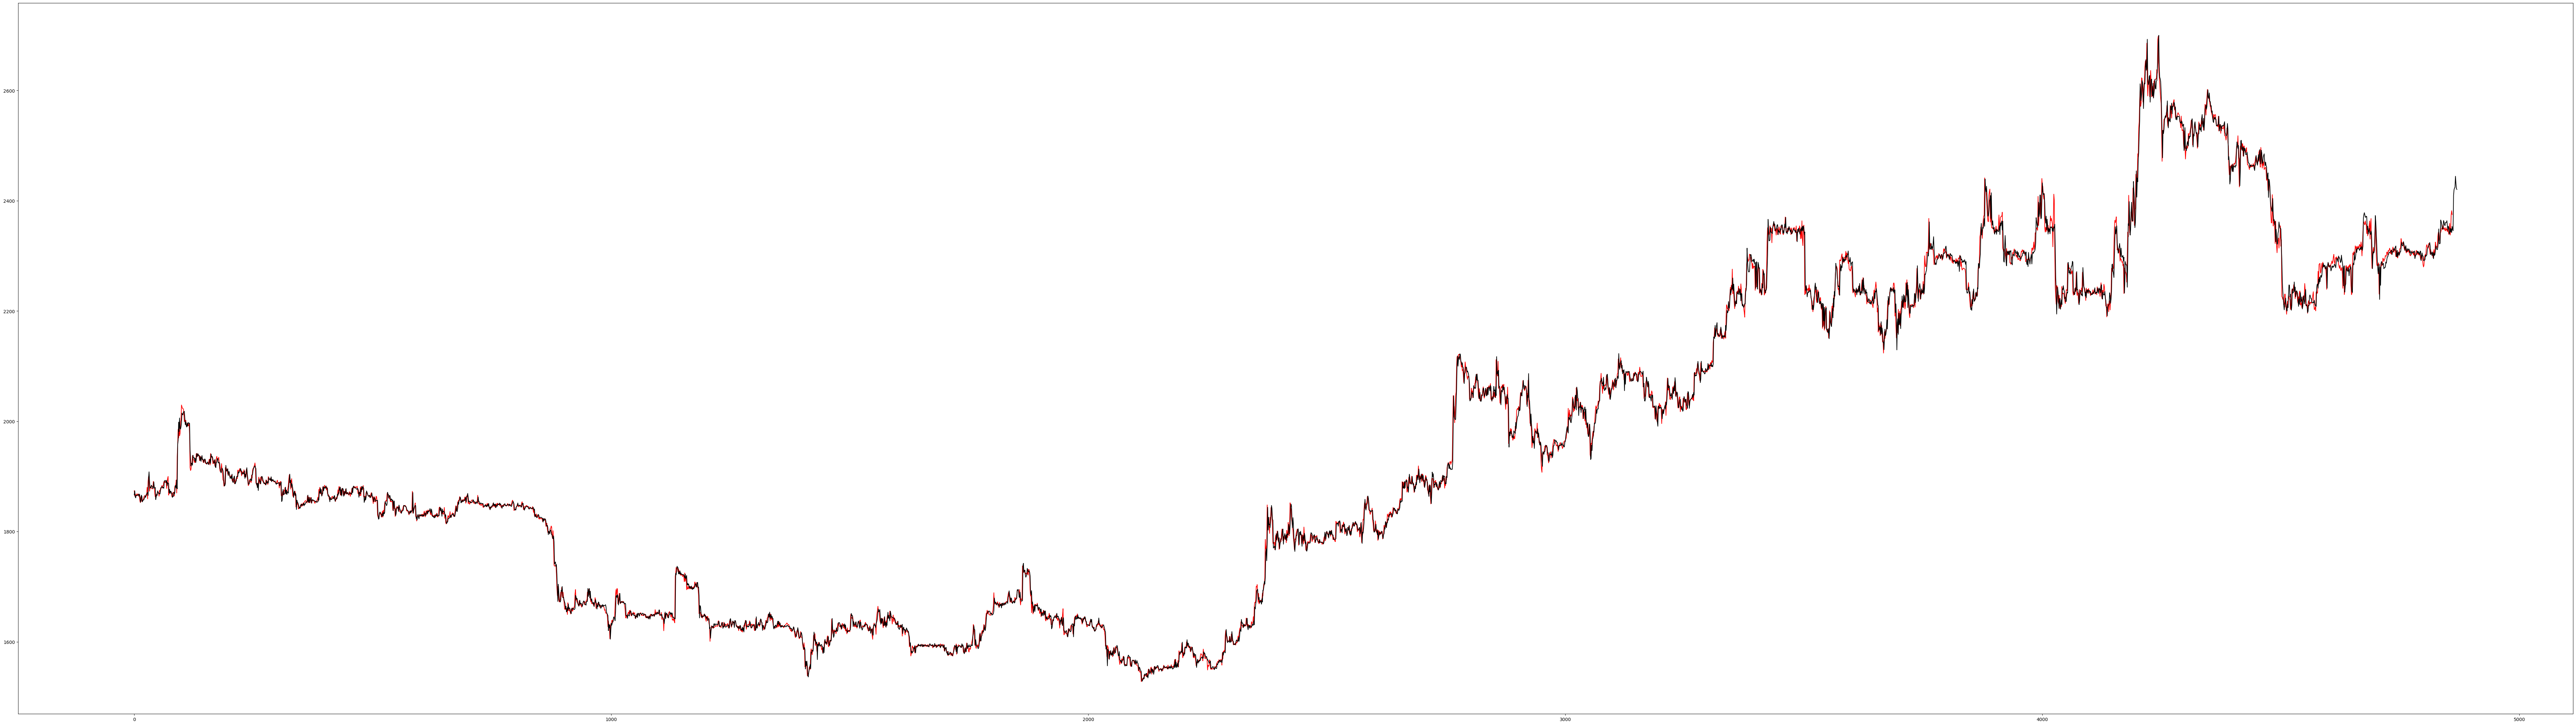

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

y_test6.reset_index(inplace=True)

plt.plot(res, color='red')
plt.plot(y_test6.pred, color='black')
plt.show()

## 10 bar shift reloaded: